<a href="https://colab.research.google.com/github/tramlam-ng/Predict_MNIST_dataset_with_ML_models/blob/main/MNIST_dataset_with_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, the goal is to train a classical ML model (no deep learning) to reach the highest accruracy score. 

- **Expected Accuracy Score on the given test set**: >89%
- **Expected Accuracy Score on the HIDDEN test set**: as high as possible. 


**Extra optional requirements**:
- Tuning your hyperparameters with both RandomSearch and GridSearch
- Use Sklearn Pipeline 


# Sample Code to get Fashion MNIST data 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

- When especially training with photo data, shape is very important. It is good to keep frequent check on it!


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# check data shape
print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# Sample Code to display images

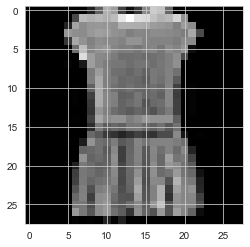

In [ ]:
plt.imshow(X_train[3], cmap='gray')

In [ ]:
def plot_images(images, labels=None):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(20,20))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    if not labels is None:
      ax.set_title(f"{labels[i]}", fontsize=16)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

In [ ]:
def get_samples(n_samples, X, y=None):
  '''Get n_samples randomly'''
  samples_index = np.random.choice(np.arange(len(X)), n_samples, replace=False)
  if not y is None:
    return X[samples_index], y[samples_index]
  return X[samples_index]

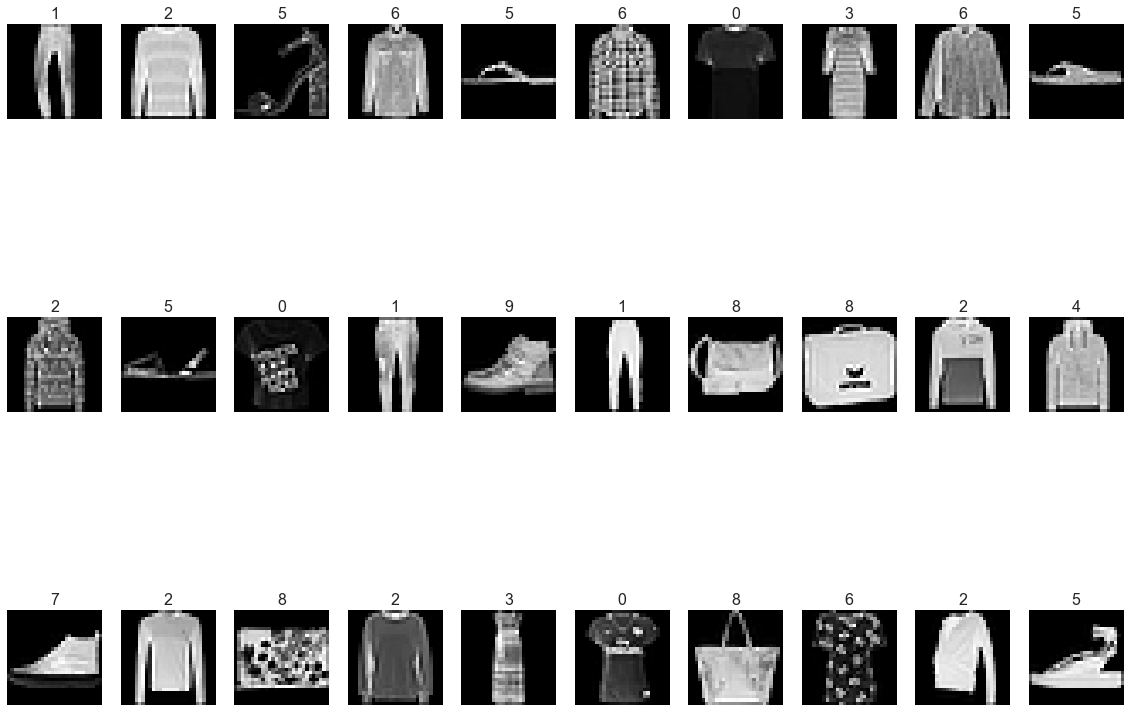

In [ ]:
images, labels = get_samples(30, X_train, y_train)
plot_images(images, labels)

In [ ]:
print('Trainingm data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Trainingm data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# Data Preprocessing

## Step 1: Data Normalization and reshape

In [ ]:
# normorlization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#double check
print(X_train.dtype, X_train.min(), X_train.max())
print(X_test.dtype, X_test.min(), X_test.max())
print('-------------')
print(X_train.shape)
print(X_test.shape)

float32 0.0 1.0
float32 0.0 1.0
-------------
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# reshape the arrays into 2D 
X_train = X_train.reshape(n_samples, -1)
X_test = X_test.reshape(n_test_samples, -1)

# Double check
print('Training data shape', X_train.shape)
print('Test data shape', X_test.shape)

Training data shape (60000, 784)
Test data shape (10000, 784)


## Step 2: Dimensionality Reduction by using PCA

- Principal Component Analysis (PCA) involves the process by which principal components are computed, and their role in understanding the data. 
- PCA is an unsupervised approach, which means that it is performed on a set of features with no associated response. All in all, PCA reduces the dimensionality of the dataset, allowing most of the variability to be explained using fewer features.
- Therefore, PCA is commonly used as one step in a series of analyses. PCA can be used to reduce the number of features and avoide multicollinearity, especially when having too many predictors relative to the number of observations

In [ ]:
pca = PCA()
pca.fit(X_train)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

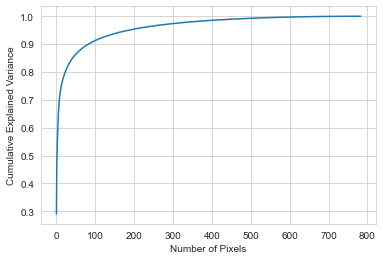

In [ ]:
sns.set_style('whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Pixels')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
# let's change n_components = 90%

pca = PCA(.90)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('The total pixels:', pca.n_components_)

The total pixels: 84


- From the PCA graph above, it is shown that it takes only about 84 features to have 90% of explained variance

# Train Models

In [ ]:
# models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.svm import SVC
# clustering
from sklearn.cluster import KMeans

# PCA
from sklearn.decomposition import PCA

# scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




## Step 1: Model Sampling
- First off, let's get sample for train set and test set in order to find the most suited ML model. 
- Due to computational constraint, we take about 30% of X_train and y_train

In [ ]:
# # get samples images randomly from train set and test set
n_samples = 20000
n_test_samples = 3000

X_train, y_train = get_samples(n_samples, X_train, y_train)
X_test, y_test = get_samples(n_test_samples, X_test, y_test)

print(X_train.shape, X_test.shape)

(20000, 784) (3000, 784)


In [ ]:
pca = PCA(n_components=84)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('The total pixels:', pca.n_components_)

The total pixels: 84


## Step 2: Baseline Models
- Next, we try some baseline model for better anticipation of which model would work best on the given dataset.
- After running some baseline models, Random Forest Classifier and XGBoost look like overfitting, KNN looks fairly decent whilst Support Vector Machines look best.

- All in all, some promising models are KNN Classifier, Support Vector Machines and Random Forest Classifier. Besides, XGBBoost at default setting is also a good consideration for hyper-parameter tuning.

- Finally, our group decided to take an adventure to **Random Forest and SVM for hyper-parameters tuning**.

In [ ]:
def Create_models():
    XGBoost = xgb.XGBClassifier()
    KNN = KNeighborsClassifier()
    SVM = SVC(probability=True)
    RandomForest = RandomForestClassifier()
    AdaBoost = AdaBoostClassifier()
    
    return ((XGBoost,"XGBoost Classifier"),(KNN, "KNN Clasifier"),(SVM,"SVC"), (RandomForest, "RandomForest Classifier"), (AdaBoost, "AdaBoost Classifier"))

In [ ]:
models = Create_models()
for model, name in models:
    model.fit(X_train_pca, y_train)
    y_train_pred = model.predict(X_train_pca)
    print(f"Accuracy of {name} on Train Set is: {accuracy_score(y_train, y_train_pred)}")
    print(f"Accuracy of {name} on Test Set is: {model.score(X_test_pca, y_test)}")

[07:34:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost Classifier on Train Set is: 1.0
Accuracy of XGBoost Classifier on Test Set is: 0.858
Accuracy of KNN Clasifier on Train Set is: 0.89605
Accuracy of KNN Clasifier on Test Set is: 0.841
Accuracy of SVC on Train Set is: 0.89915
Accuracy of SVC on Test Set is: 0.8653333333333333
Accuracy of RandomForest Classifier on Train Set is: 1.0
Accuracy of RandomForest Classifier on Test Set is: 0.843
Accuracy of AdaBoost Classifier on Train Set is: 0.51785
Accuracy of AdaBoost Classifier on Test Set is: 0.5233333333333333


- After running some baseline models, Random Forest Classifier and XGBoost look like overfitting, KNN looks fairly decent whilst Support Vector Machines look best.
- All in all, some promising models are KNN Classifier, Support Vector Machines and Random Forest Classifier. Besides, XGBBoost at default setting is also a good consideration for hyper-parameter tuning.

- Finally, our group decided to take an adventure to **Random Forest and SVM for hyper-parameters tuning**.

## Model Training 1: RandomForest




In [ ]:
model_ranfor = RandomForestClassifier()
param_grid = {
    'max_depth': [9,10,11,12,13,14,15,16,17,18,19,20],
    'n_estimators': [150,200,250,300],
    'max_features': ['sqrt'], #
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[2,3,4]
}

In [ ]:
# Use Gridsearch RandomForest
gridsearch_models_RF = GridSearchCV(model_ranfor,
                                 param_grid,
                                 scoring = 'accuracy',
                                 return_train_score=True,
                                 cv=5,
                                 verbose=2,
                                 n_jobs=1)
randomize_models_RF = RandomizedSearchCV(model_ranfor,
                                      param_grid,
                                      n_iter = 60,
                                      scoring='accuracy',
                                      return_train_score=True,
                                      cv= 5, 
                                      verbose=2,
                                      n_jobs=1)

In [ ]:
gridsearch_models_RF.fit(X_train_flat, y_train_flat)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   1.8s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   1.8s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150 
[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   1.8s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150 
[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   1.8s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150 
[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150, total=   1.8s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   2.4s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=3, min_

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed: 98.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
randomize_models_RF.fit(X_train_flat, y_train_flat)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12, total=   3.7s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12, total=   3.7s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12, total=   3.7s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12, total=   3.6s
[CV] n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12 
[CV]  n_estimators=300, min_samples_split=3, min_samples_leaf=4, max_features=sqrt, max_depth=12, total=   3.7s
[CV] n_estimators=250, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=19 
[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=19, total=   3.2s
[CV] n_estimators=250, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 15.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print('Best params Gridsearch', gridsearch_models_RF.best_params_)
print('Best score Gridsearch', gridsearch_models_RF.best_score_)
print('----'*19)
print('Best params Randomize', randomize_models_RF.best_params_)
print('Best score Randomize', randomize_models_RF.best_score_)

Best params Gridsearch {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 250}
Best score Gridsearch 0.8305
----------------------------------------------------------------------------
Best params Randomize {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20}
Best score Randomize 0.8290000000000001


In [ ]:
best_model_gridsearch_RF = gridsearch_models_RF.best_estimator_
best_model_randomsearch_RF = randomize_models_RF.best_estimator_

print(best_model_gridsearch_RF)
print('----'*20)
print(best_model_randomsearch_RF)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
--------------------------------------------------------------------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
   

In [ ]:
pd.DataFrame(gridsearch_models_RF.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.834505,0.020141,0.021121,0.000412,9,sqrt,3,2,150,"{'max_depth': 9, 'max_features': 'sqrt', 'min_...",0.82,0.8325,0.82,0.835,0.8275,0.827,0.006205,1,0.96875,0.97,0.96375,0.963125,0.970625,0.96725,0.003177


In [ ]:
pd.DataFrame(randomize_models_RF.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.808675,0.017771,0.021475,0.000495,150,2,3,sqrt,9,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.8175,0.8375,0.825,0.825,0.84,0.829,0.008456,1,0.965625,0.969375,0.965625,0.963125,0.971875,0.967125,0.003102


In [ ]:
np.sqrt(-gridsearch_models_RF.best_score_)

2.88134668638656

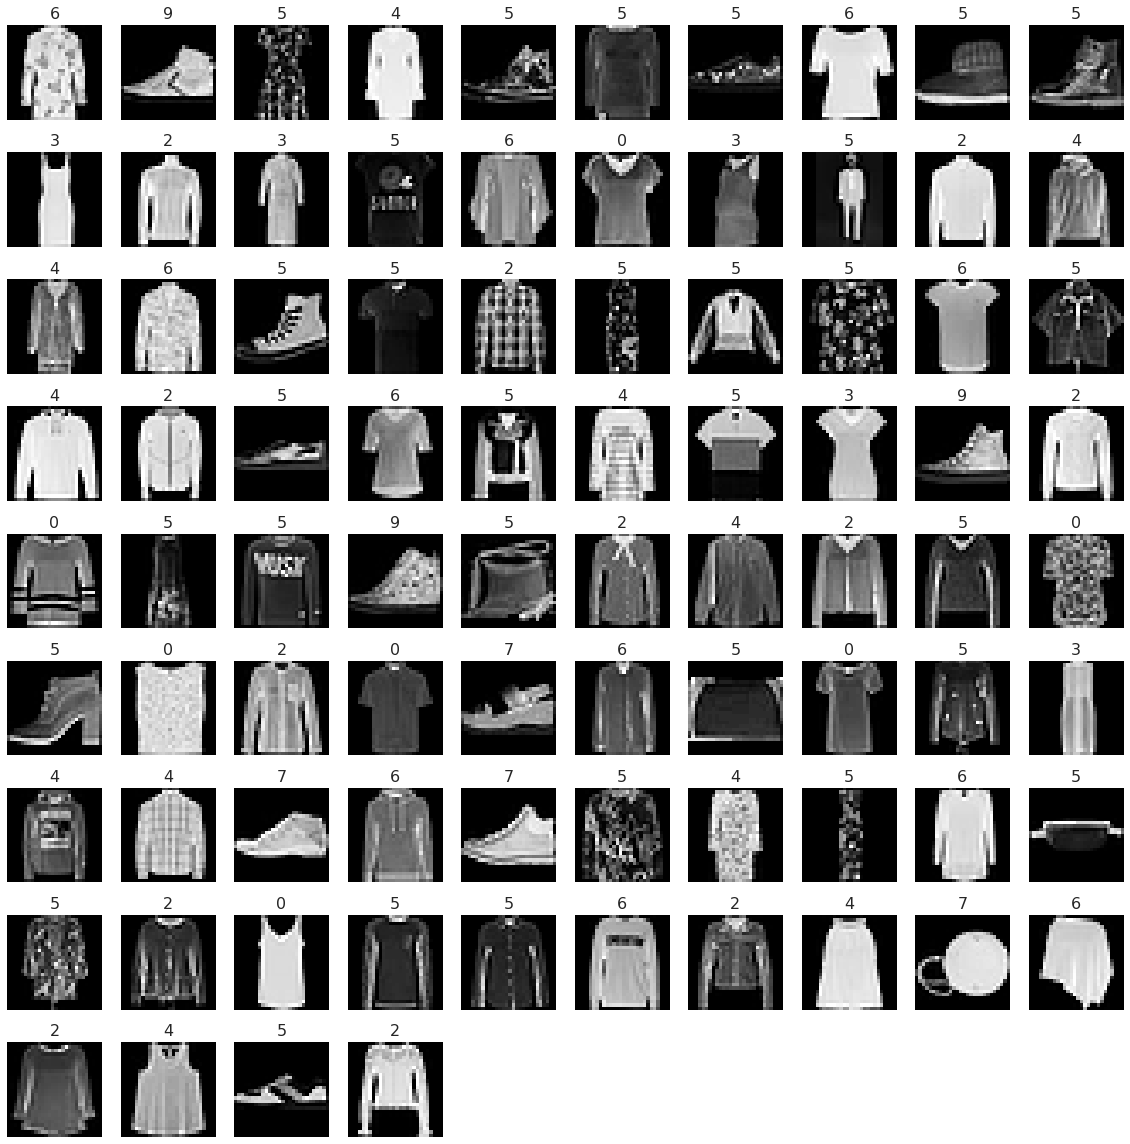

In [ ]:
imgs, lbls = X_test_flat[predictions_gridsearch!=y_test_flat], predictions_gridsearch[predictions_gridsearch!=y_test_flat]
imgs = imgs.reshape((imgs.shape[0],28,28))
plot_images(imgs, lbls)

## Model Training 2: Support Vector Machines
- Actually the results below are the best result after many rounds of trials and errors.
- Eventually, we've run SVM model to the whole train set and test set (with 60,000 and 10,000 samples respectively) and got the best score as:
  - **Accuracy Score of Train Set: 90.4%**
  - ***Accuracy Score of Test Set: 89.9%***

- Accordingly, we use the best params in SVM as the best model to run the augmented test set later.

In [ ]:
g_range = np.logspace(-2,-1,10, endpoint=True)
c_range = np.logspace(0,0.6,10, endpoint=True)


print(list(g_range))
print('------------')
print(list(c_range))

[0.01, 0.01291549665014884, 0.016681005372000592, 0.021544346900318832, 0.027825594022071243, 0.03593813663804628, 0.046415888336127774, 0.05994842503189409, 0.0774263682681127, 0.1]
------------
[1.0, 1.1659144011798317, 1.3593563908785256, 1.5848931924611136, 1.847849797422291, 2.154434690031884, 2.51188643150958, 2.9286445646252366, 3.4145488738336014, 3.9810717055349722]


In [ ]:
%%time
params = {'C' : c_range,
          'gamma': g_range}

svc = SVC()
kfolds= KFold(n_splits=5, shuffle=True, random_state=42)

rscv = RandomizedSearchCV(svc,params, cv=kfolds, scoring='accuracy',
                                n_iter=30, random_state=42, n_jobs = -1, verbose =2)
rscv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 1min 26s, sys: 1.91 s, total: 1min 28s
Wall time: 1h 5min 3s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': array([1.        , 1.1659144 , 1.35935639, 1.58489319, 1.8478498 ,
       2.15443469, 2.51188643, 2.92864456, 3.41454887, 3.98107171]),
                                        'gamma': array([0.01      , 0.0129155 , 0.01668101, 0.02154435, 0.02782559,
       0.03593814, 0.04641589, 0.05994843, 0.07742637, 0.1       ])},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
cv_result_df = pd.DataFrame(rscv.cv_results_)
cv_result_df = cv_result_df.sort_values('rank_test_score')
for rec in cv_result_df[['params','mean_test_score','std_test_score','rank_test_score']].values[:5]:
    print('-'*10)
    print(f'Rank {rec[-1]}')
    print(f'Params: {rec[0]}')
    print(f'Mean score:{rec[1]:.3f} +- {rec[2]:.3f}')

----------
Rank 1
Params: {'gamma': 0.046415888336127774, 'C': 3.9810717055349722}
Mean score:0.904 +- 0.004
----------
Rank 2
Params: {'gamma': 0.046415888336127774, 'C': 2.9286445646252366}
Mean score:0.903 +- 0.004
----------
Rank 3
Params: {'gamma': 0.05994842503189409, 'C': 2.9286445646252366}
Mean score:0.903 +- 0.003
----------
Rank 4
Params: {'gamma': 0.0774263682681127, 'C': 3.4145488738336014}
Mean score:0.902 +- 0.004
----------
Rank 5
Params: {'gamma': 0.03593813663804628, 'C': 2.154434690031884}
Mean score:0.902 +- 0.003


In [ ]:
best_model = rscv.best_estimator_
predictions = best_model.predict(X_test_pca) # predictions on test set
print('Accuracy Score:', accuracy_score(y_test, predictions))

Accuracy Score: 0.8999


# Test Set

In [ ]:
X_test_augmented = np.load('Downloads/FMNIST_augmented_test.npy')

In [ ]:
X_test_augmented.shape

(40000, 28, 28)

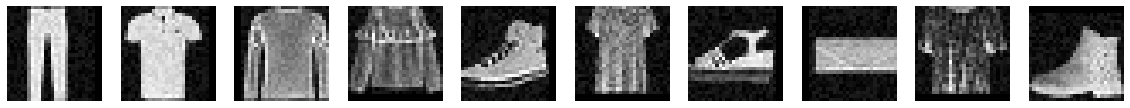

In [ ]:
images = get_samples(10, X_test_augmented)
plot_images(images)



This test set is slightly different from the train set because is had been added some noise. 

In [ ]:
# Augmented Test Normalization
def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

X_test_augmented_flat = normalization(X_test_augmented)

In [ ]:
X_test_augmented_flat = X_test_augmented_flat.reshape(X_test_augmented_flat.shape[0],-1)

In [ ]:
X_test_augmented_flat.shape

(40000, 784)

- This time, we decided to run the best model for the whole Train Set (60,000 samples) without applying dimension reduction.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)


Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [ ]:
# normorlization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# reshape the arrays into 2D 
X_train = X_train.reshape(n_samples, -1)
X_test = X_test.reshape(n_test_samples, -1)

# Double check
print('Training data shape', X_train.shape)
print('Test data shape', X_test.shape)

Training data shape (60000, 784)
Test data shape (10000, 784)


- Time to predict the new Test Set and make the dataframe out of the prediction result.

In [ ]:
%%time

best_model.fit(X_train,y_train)
final_pred = best_model.predict(X_test_augmented_flat)

CPU times: user 22min 18s, sys: 6.85 s, total: 22min 25s
Wall time: 22min 28s


In [ ]:
df_pred = pd.DataFrame(final_pred, columns=['Predictions'])

df_pred.value_counts()

Predictions
8              7274
0              4921
6              4424
3              4404
5              4174
9              3955
7              3461
2              2649
1              2404
4              2334
dtype: int64